# Overview

# Imports

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append('../src')
sys.path.append('../data')

In [18]:
from bs4 import BeautifulSoup
import datetime
import guess_letters
import pandas as pd
from pathlib import Path
import requests

# Filepaths and data sources

In [9]:
past_words_url = 'https://www.rockpapershotgun.com/wordle-past-answers'
all_words_path = Path('../data/words5-from-OSPD4') 

# Get all used wordle words and a list of all 5 letter words from the internet

## Used words
* On the page, this is how the wordlist is starting, under this heading h2:

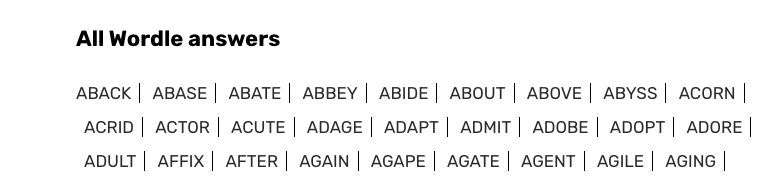

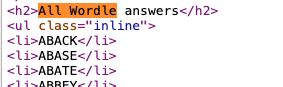

* Use the created guess_letters module to get a df of all used words from this website.

In [6]:
used_df = guess_letters.get_used_words(past_words_url='https://www.rockpapershotgun.com/wordle-past-answers',
                                       heading_to_find='all wordle answers',
                                       heading_tag='h2')

In [7]:
used_df

,word,updated
0,aback,2025-04-28
1,abase,2025-04-28
2,abate,2025-04-28
3,abbey,2025-04-28
4,abide,2025-04-28
...,...,...
1404,yield,2025-04-28
1405,young,2025-04-28
1406,youth,2025-04-28
1407,zebra,2025-04-28


## All 5 letter words

* List of 5 letter words was taken from Donald Knuth's (Stanford) webpage:
    * https://www-cs-faculty.stanford.edu/~knuth/programs.html
    * wordlists.tgz/words5-from-OSPD4.txt - 'English words of lengths 2 thru 12 [OSPD4], ordered by frequency'

In [28]:
all_words_list = guess_letters.clean_all_words(all_words_path)

In [29]:
all_words_list

['which',
 'their',
 'would',
 'there',
 'about',
 'other',
 'could',
 'first',
 'these',
 'after',
 'where',
 'think',
 'years',
 'being',
 'those',
 'right',
 'three',
 'still',
 'going',
 'might',
 'under',
 'again',
 'never',
 'found',
 'while',
 'place',
 'local',
 'small',
 'since',
 'world',
 'great',
 'given',
 'point',
 'quite',
 'until',
 'often',
 'later',
 'money',
 'every',
 'taken',
 'large',
 'house',
 'thing',
 'night',
 'group',
 'early',
 'order',
 'water',
 'asked',
 'women',
 'least',
 'round',
 'whole',
 'power',
 'young',
 'doing',
 'state',
 'terms',
 'means',
 'level',
 'known',
 'times',
 'party',
 'clear',
 'major',
 'words',
 'above',
 'along',
 'areas',
 'using',
 'start',
 'sense',
 'light',
 'study',
 'began',
 'seems',
 'staff',
 'child',
 'range',
 'close',
 'needs',
 'woman',
 'among',
 'black',
 'today',
 'whose',
 'heard',
 'front',
 'leave',
 'short',
 'death',
 'white',
 'shall',
 'based',
 'cases',
 'hours',
 'human',
 'hands',
 'value',
 'third',


# Analyze all 5 letter words that have not yet come up in Wordle

## Get all words not yet come up in Wordle

In [64]:
used_set = set(used_df['word'].to_list())
all_set = set(all_words_list)

In [86]:
# get the difference i.e. words left to come in Wordle
left_set = sorted(all_set.difference(used_set))

In [87]:
left_set

['aahed',
 'aalii',
 'aargh',
 'abaca',
 'abaci',
 'abaft',
 'abaka',
 'abamp',
 'abash',
 'abaya',
 'abbas',
 'abbes',
 'abbot',
 'abeam',
 'abele',
 'abets',
 'abhor',
 'abled',
 'abler',
 'ables',
 'abmho',
 'abode',
 'abohm',
 'aboil',
 'aboma',
 'aboon',
 'abort',
 'abris',
 'abuse',
 'abuts',
 'abuzz',
 'abyes',
 'abysm',
 'acari',
 'acerb',
 'aceta',
 'ached',
 'aches',
 'achoo',
 'acids',
 'acidy',
 'acing',
 'acini',
 'ackee',
 'acmes',
 'acmic',
 'acned',
 'acnes',
 'acock',
 'acold',
 'acred',
 'acres',
 'acted',
 'actin',
 'acyls',
 'addax',
 'added',
 'adder',
 'addle',
 'adeem',
 'adept',
 'adieu',
 'adios',
 'adits',
 'adman',
 'admen',
 'admix',
 'adobo',
 'adorn',
 'adown',
 'adoze',
 'adunc',
 'adust',
 'adyta',
 'adzed',
 'adzes',
 'aecia',
 'aedes',
 'aegis',
 'aeons',
 'aerie',
 'afars',
 'afire',
 'afoot',
 'afore',
 'afoul',
 'afrit',
 'agama',
 'agars',
 'agave',
 'agaze',
 'agene',
 'agers',
 'agger',
 'aggie',
 'aggro',
 'aghas',
 'agios',
 'agism',
 'agist',


## Find the most common first 3 letters i.e. highest number of words having the same first 3 letters

In [88]:
first_three = [word[:3] for word in left_set]

In [89]:
first_three

['aah',
 'aal',
 'aar',
 'aba',
 'aba',
 'aba',
 'aba',
 'aba',
 'aba',
 'aba',
 'abb',
 'abb',
 'abb',
 'abe',
 'abe',
 'abe',
 'abh',
 'abl',
 'abl',
 'abl',
 'abm',
 'abo',
 'abo',
 'abo',
 'abo',
 'abo',
 'abo',
 'abr',
 'abu',
 'abu',
 'abu',
 'aby',
 'aby',
 'aca',
 'ace',
 'ace',
 'ach',
 'ach',
 'ach',
 'aci',
 'aci',
 'aci',
 'aci',
 'ack',
 'acm',
 'acm',
 'acn',
 'acn',
 'aco',
 'aco',
 'acr',
 'acr',
 'act',
 'act',
 'acy',
 'add',
 'add',
 'add',
 'add',
 'ade',
 'ade',
 'adi',
 'adi',
 'adi',
 'adm',
 'adm',
 'adm',
 'ado',
 'ado',
 'ado',
 'ado',
 'adu',
 'adu',
 'ady',
 'adz',
 'adz',
 'aec',
 'aed',
 'aeg',
 'aeo',
 'aer',
 'afa',
 'afi',
 'afo',
 'afo',
 'afo',
 'afr',
 'aga',
 'aga',
 'aga',
 'aga',
 'age',
 'age',
 'agg',
 'agg',
 'agg',
 'agh',
 'agi',
 'agi',
 'agi',
 'agi',
 'agl',
 'agl',
 'agl',
 'agm',
 'ago',
 'ago',
 'ago',
 'agr',
 'agu',
 'ahi',
 'aho',
 'ahu',
 'aid',
 'aid',
 'aid',
 'ail',
 'aim',
 'aim',
 'aio',
 'air',
 'air',
 'air',
 'air',
 'air',


In [104]:
# dictionary showing groups of 3 letters as keys and number of words with that first 3 letters as values
word_tally = {}

# dictionary showing groups of 3 letters as keys and corresponding words with those starting letters
word_dct = {}

for group in first_three:
    if group not in word_tally:
        tally = first_three.count(group)
        word_tally[group] = tally

        # get index of that group of letters
        start_index = first_three.index(group)
        if tally == 1:
            
            # collect that associated word
            word = left_set[start_index]

            # initialize a list
            word_dct[group] = [word]

        else:
            # use the starting index and find index from reverse so the whole chunk can be extracted out
            end_index = first_three[::-1].index(group)
            length = len(first_three)

            # collect words
            word_dct[group] = left_set[start_index:(length-end_index)]

# find the max no. of words with the same first 3 letters
max_num = max(word_tally.values())

most_frequent_group = [key for key, value in word_tally.items() if value == max_num]

print(f'Group(s) with highest number of words i.e. {max_num} : {most_frequent_group}')

for group in most_frequent_group:
    print(f"Here's a list of words starting with {group}:")
    print(word_dct[group])

Group(s) with highest number of words i.e. 27 : ['chi']
Here's a list of words starting with chi:
['chiao', 'chias', 'chica', 'chick', 'chico', 'chics', 'chide', 'chiel', 'chile', 'chili', 'chimb', 'chimp', 'china', 'chine', 'chink', 'chino', 'chins', 'chips', 'chirk', 'chirm', 'chiro', 'chirp', 'chirr', 'chiru', 'chits', 'chive', 'chivy']
